## Image clustering

In [1]:
import pandas as pd
import numpy as np
from PIL import Image 
from webcolors import rgb_to_hex
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt

#from __future__ import print_function
import webcolors
from scipy.spatial import KDTree

Número de clusters a generar

In [2]:
clusters = 9

In [3]:
# Read image 
img = Image.open('../masterclass_r - enviar/pruebas imagenes/bola-cristal-futuro-990x593.jpg') 
  
# Output Images 
#img.show()
np_im = np.array(img)

In [4]:
np_im.shape

(593, 990, 3)

In [5]:
# Calculamos dimensiones de la imagen
width, height = img.size
print(f'Las dimensiones de la imagen son {width}x{height}')

Las dimensiones de la imagen son 990x593


In [6]:
# Convierte la imagen a RGB
mode = img.mode
if mode == 'RGB':
    print(f'El modo de la imagen es {mode}')
else:
    img.convert('RGB')
    print(f'Reconversion del modo {mode} a {img.mode}')

El modo de la imagen es RGB


In [7]:
# Generamos un registro para cada pixel de la imagen
x = []
for h in range(height):
    for w in range(width):
        x.append(w)
    
y = []
for w in range(width):
    for h in range(height):
        y.append(h)

In [8]:
# Creamos un dataframe con los pixeles
image = pd.DataFrame({
    'x': x,
    'y': y
})

In [9]:
# lets populate some names into spatial name database
hexnames = webcolors.CSS3_HEX_TO_NAMES

names = []
positions = []

for hex, name in hexnames.items():
    names.append(name)
    positions.append(webcolors.hex_to_rgb(hex))

spacedb = KDTree(positions)

In [10]:
# Extraemos los canales RGB para cada pixel
r = []; g = []; b = []; hexa = []; col_name = []
for i in range(len(image)):
    pix_x = int(image['x'][i])
    pix_y = int(image['y'][i])
    R, G, B = img.getpixel((pix_x, pix_y))
    h = webcolors.rgb_to_hex((R, G, B))
    querycolor = (R, G, B)
    dist, index = spacedb.query(querycolor)
    r.append(R)
    g.append(G)
    b.append(B)
    hexa.append(h)
    col_name.append(names[index])

In [11]:
# Añadimos al dataframe
image['r'] = r
image['g'] = g
image['b'] = b
image['hexa'] = hexa
image['col_name'] = col_name

In [12]:
X = image[['r', 'g', 'b']]

In [13]:
kmeans = KMeans(n_clusters = clusters, random_state=0).fit(X)

In [14]:
image['cluster'] = kmeans.predict(X)

In [15]:
image.head()

,x,y,r,g,b,hexa,col_name,cluster
0,0,0,11,11,11,#0b0b0b,black,6
1,1,1,11,11,11,#0b0b0b,black,6
2,2,2,11,11,11,#0b0b0b,black,6
3,3,3,11,11,11,#0b0b0b,black,6
4,4,4,11,11,11,#0b0b0b,black,6


In [16]:
labels = []
for c in range(clusters):
    labels.append(c)

In [17]:
centroides = pd.DataFrame({
    'cluster': labels,
    'c_r': kmeans.cluster_centers_[:,0],
    'c_g': kmeans.cluster_centers_[:,1],
    'c_b': kmeans.cluster_centers_[:,2]
})

centroides['c_r'] = centroides['c_r'].astype(int)
centroides['c_g'] = centroides['c_g'].astype(int)
centroides['c_b'] = centroides['c_b'].astype(int)

centroides

,cluster,c_r,c_g,c_b
0,0,45,96,132
1,1,12,16,52
2,2,156,198,219
3,3,215,228,238
4,4,20,52,92
5,5,100,158,186
6,6,11,11,16
7,7,170,159,175
8,8,116,112,136


In [18]:
image = image.merge(centroides, on = 'cluster', how = 'left')

In [19]:
image.head()

,x,y,r,g,b,hexa,col_name,cluster,c_r,c_g,c_b
0,0,0,11,11,11,#0b0b0b,black,6,11,11,16
1,1,1,11,11,11,#0b0b0b,black,6,11,11,16
2,2,2,11,11,11,#0b0b0b,black,6,11,11,16
3,3,3,11,11,11,#0b0b0b,black,6,11,11,16
4,4,4,11,11,11,#0b0b0b,black,6,11,11,16


In [20]:
# Extraemos los canales RGB para cada pixel
clus_name = []
for i in range(len(image)):
    c_R = image['c_r'][i]
    c_G = image['c_g'][i]
    c_B = image['c_b'][i]
    querycolor = (c_R, c_G, c_B)
    dist, index = spacedb.query(querycolor)
    clus_name.append(names[index])

In [21]:
image['cluster_name'] = clus_name

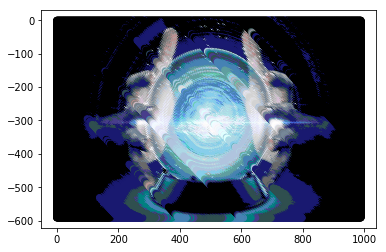

In [22]:
#figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
plt.scatter(x = image['x'], y = -image['y'],  c = image['col_name'])

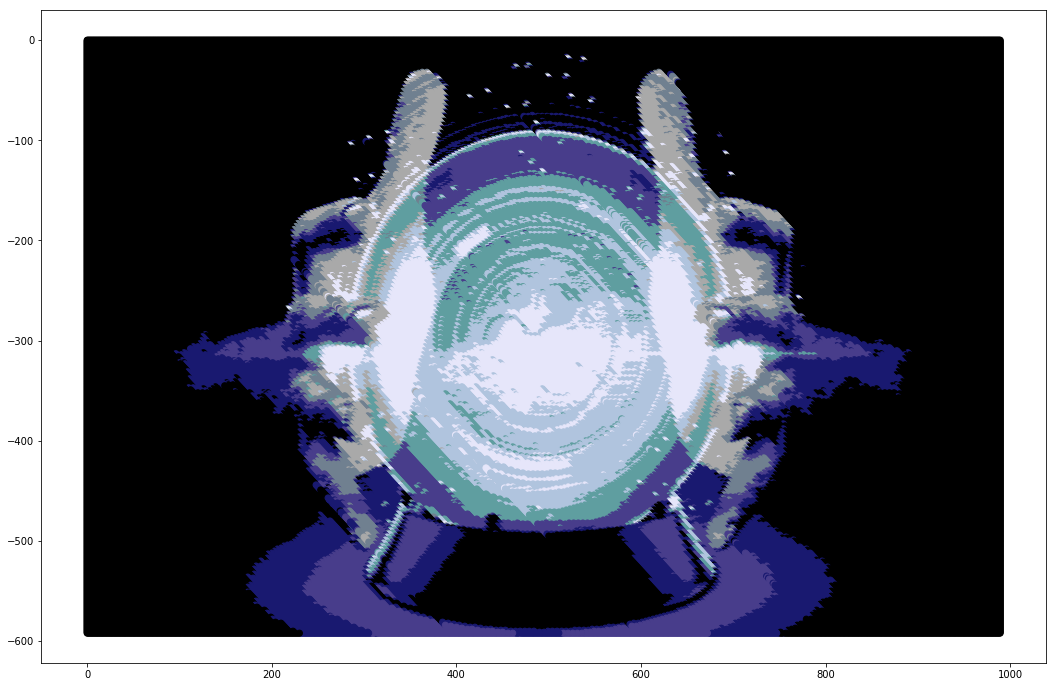

In [23]:
plt.figure(figsize=(18, 12))
plt.scatter(x = image['x'], y = -image['y'],  c = image['cluster_name'])